### 主要看继承关系, 谁是interface, 谁是实体class

记住两类, Collection和Map, 第二层Map分为..., Collection分为List(ArrayList), Queue(ArrayDeque)以及Set(HashSet, LinkedSet, TreeSet)

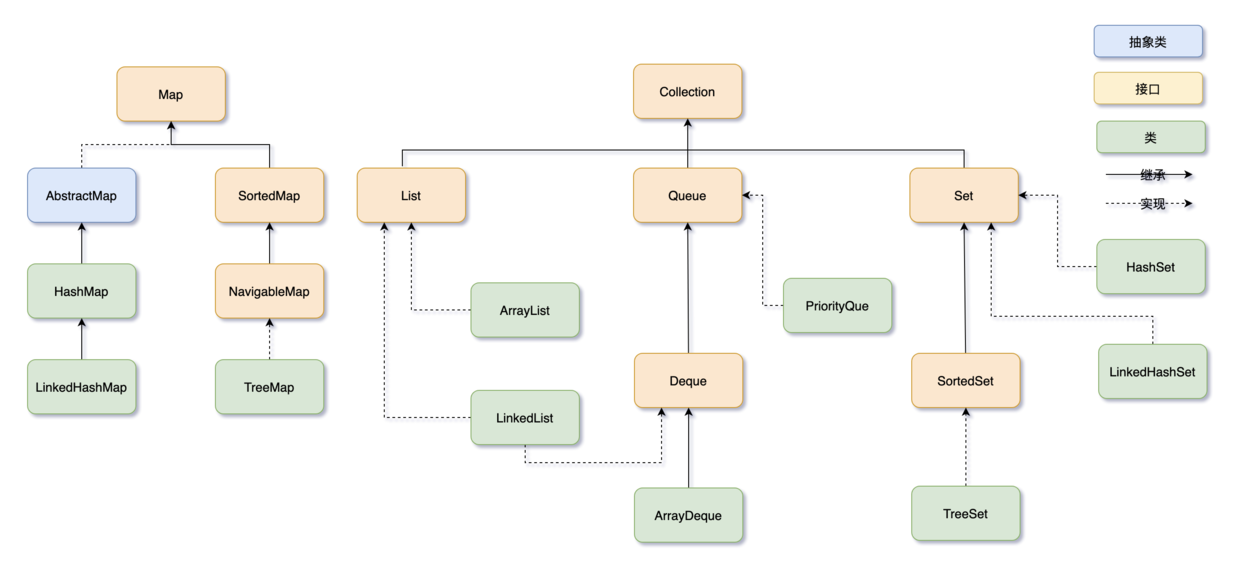

# Collection & Map
---

- Collection，主要由 List、Set、Queue 组成，List 代表有序、可重复的集合，典型代表就是封装了动态数组的 ArrayList 和封装了链表的 LinkedList；Set 代表无序、不可重复的集合，典型代表就是 HashSet 和 TreeSet；Queue 代表队列，典型代表就是双端队列 ArrayDeque，以及优先级队列 PriorityQueue。
- Map，代表键值对的集合，典型代表就是 HashMap。


# 1. List
---

> List 的特点是有序，可以存放重复的元素，可以用下标对元素进行操作

注意这里说的有序指的不是按照大小排列的那种顺序, 而是按照存储的先后时间决定元素在的内存的位置, 比如我存的时候是1 2 3 4 5 ，那么取出来应该是1 2 3 4 5 或者 5 4 3 2 1. List都是连续的, 因此可以用Index访问. 但Set和Map不同, 他们元素的位置散乱(看似散乱)分布在各个位置. 

## 1）ArrayList
- ArrayList由数组实现，**随机存取O(1)**
- **从尾部插入和删除元素快**，从中间插入和删除元素会比较低效，因为涉及到数组元素的复制和移动；
- 如果内部数组的容量不足时会自动扩容，因此当元素非常庞大的时候，效率会比较低。

## 2）LinkedList
可以说基本上没有用到LinkedList的场景, 你说从频繁前后删除插入(从开头插入不适合ArrayList), 有queue. 虽然插入删除LinkedList比较快, 但从中间插入删除的话, 你还要遍历去找目的位置, 因为LinkedList不支持随机存取(`get()` O(n)), 这时候就不如用ArrayList了, 因为存储node指针, 会有额外开销. 

> `remove(int)` and `remove(Object)` operations, on the other hand, are not `O(1)`. They requires traversal, so you correctly identified their costs as `O(n)`. https://stackoverflow.com/a/42849573/16317008

Joshua Bloch, the author of LinkedList:

> Does anyone actually use LinkedList? I wrote it, and I never use it. https://stackoverflow.com/a/42529652/16317008

## 3) Vector 和 Stack
List 的实现类还有一个 Vector，是一个元老级的类，比 ArrayList 出现得更早。ArrayList 和 Vector 非常相似，只不过 Vector 是线程安全的，像 get、set、add 这些方法都加了 `synchronized` 关键字，就导致执行执行效率会比较低，所以现在已经很少用了。**更好的选择是并发包下的`CopyOnWriteArrayList`**. 

Stack 是 Vector 的一个子类，本质上也是由动态数组实现的，只不过还实现了先进后出的功能（在 get、set、add 方法的基础上追加了 pop、peek 等方法），所以叫栈。不过，由于 Stack 执行效率比较低（方法上同样加了 synchronized 关键字），就被**双端队列 `ArrayDeque`** 取代了。


# 2. Queue
---

Queue，也就是队列，通常遵循先进先出（FIFO）的原则，新元素插入到队列的尾部，访问元素返回队列的头部。

## 1) ArrayDeque

- 用stack和queue的时候直接选ArrayDeque
- **Queue->Deque->ArrayDeque(Deque和Queue是Interface)**
- ArrayDeque是非线程安全的（not thread-safe），当多个线程同时使用的时候，需要手动同步；另外，该容器不允许放入null元素。

## 2）PriorityQueue

PriorityQueue 是一种优先级队列，它的出队顺序与元素的优先级有关，执行 remove 或者 poll 方法，返回的总是优先级最高的元素。

要想有优先级，元素就需要实现 Comparable 接口或者 Comparator 接口。



# 2. Set
---

> Set 的特点是无序，不可以存放重复的元素，不可以用下标对元素进行操作

注意这里说的有序指的不是按照大小排列的那种顺序, 而是按照存储的先后时间决定元素在的内存的位置, 比如我存的时候是1 2 3 4 5 ，那么取出来应该是1 2 3 4 5 或者 5 4 3 2 1. List都是连续的, 因此可以用Index访问. 但Set和Map不同, 他们元素的位置散乱(看似散乱)分布在各个位置, 比如我存的是1 2 3, 可能打印出来时 3 1 2. 


## 1) HashSet 

```java
public class HashSet<E> implements Set<E> ...
```

## 2) TreeSet

```java
public class TreeSet<E> implements NavigableSet<E> ...
```

## 3) LinkedHashSet

```java
public class LinkedHashSet<E> extends HashSet<E>, implements Set<E> ...
```

其实这些都在上面的图中了. 

# 4. Map
---

> Map 保存的是键值对，键要求保持唯一性，值可以重复。

## 1）HashMap

HashMap 实现了 **Map 接口**，根据键的 HashCode 值来存储数据，具有很快的访问速度，最多允许一个 null 键。

HashMap 不论是在学习还是工作当中，使用频率都是相当高的。随着 JDK 版本的不断更新，HashMap 的底层也优化了很多次，JDK 8 的时候引入了红黑树。

一旦 HashMap 发生哈希冲突，就把相同键位的地方改成链表，如果链表的长度超过 8，就该用红黑树。

## 2）LinkedHashMap

大多数情况下，只要不涉及线程安全问题，Map基本都可以使用HashMap，不过HashMap有一个问题，就是迭代HashMap的顺序并不是HashMap放置的顺序，也就是无序。HashMap的这一缺点往往会带来困扰，因为有些场景，我们期待一个有序的Map。

于是 LinkedHashMap 就闪亮登场了。LinkedHashMap 是 HashMap 的子类，内部使用链表来记录插入/访问元素的顺序。

LinkedHashMap 可以看作是 HashMap + LinkedList 的合体，它使用了 哈希表来存储数据，又用了双向链表来维持顺序。

